# Explore Exercises
Our Zillow scenario continues:

As a Codeup data science graduate, you want to show off your skills to the ```Zillow``` data science team in hopes of getting an interview for a position you saw pop up on LinkedIn. You thought it might look impressive to build an end-to-end project in which you use some of their Kaggle data to predict property values using some of their available features; who knows, you might even do some feature engineering to blow them away. Your goal is to predict the values of single unit properties using the observations from ```2017```.

In these exercises, you will run through the stages of exploration as you continue to work toward the above goal.

In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

# import preprocessing
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer

import seaborn as sns
import matplotlib.pyplot as plt
# Only works inside notebook
%matplotlib inline 

import QMCBT_wrangle as w
import QMCBT_explore_evaluate as ee
from env import user, password, host

import warnings
warnings.filterwarnings("ignore")

# 1. As with ```encoded``` vs. ```unencoded``` data, we recommend exploring ```un-scaled``` data in your EDA process.

# 2. Make sure to perform a ```train```, ```validate```, ```test``` split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

In [2]:
# use custom wrangle function to automate Acquire and Prepare
df = w.wrangle_zillow()

In [3]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,2013746,2013747,2013748,2013749,2013750,2013751,2013752,2013753,2013754,2013755
bedrooms,4,3,3,3,3,3,4,3,4,3,...,4,3,3,3,4,3,4,4,3,4
bathrooms,2.0,4.0,2.0,1.0,2.0,2.0,4.0,2.5,3.5,2.5,...,3.0,2.5,3.5,2.0,2.0,2.5,3.0,4.5,2.5,4.0
bath_to_bed_ratio,2.0,0.75,1.5,3.0,1.5,1.5,1.0,1.2,1.1429,1.2,...,1.3333,1.2,0.8571,1.5,2.0,1.2,1.3333,0.8889,1.2,1.0
sqft,3633,1620,2077,1244,1300,1222,4144,1821,2684,2284,...,2541,2033,1980,1917,1987,1809,2262,3127,1974,2110
yearbuilt,2005,2011,1926,1950,1950,1951,2016,2013,2014,2014,...,2013,2015,2014,1946,1955,2012,2015,2014,2015,2014
age,12,6,91,67,67,66,1,4,3,3,...,4,2,3,71,62,5,2,3,2,3
tax_appraisal,296425,847770,646760,169471,233266,290492,1303522,537949,644990,934353,...,1156108,641757,773358,408680,259913,405547,960756,536061,424353,554009
tax_bill,6941.39,10244.94,7924.68,2532.88,3110.99,3870.25,14820.1,6173.72,7572.58,13273.94,...,15568.38,10009.46,8347.9,4341.32,3175.66,4181.1,13494.52,6244.16,5302.7,6761.2
tax_percentage,0.0234,0.0121,0.0123,0.0149,0.0133,0.0133,0.0114,0.0115,0.0117,0.0142,...,0.0135,0.0156,0.0108,0.0106,0.0122,0.0103,0.014,0.0116,0.0125,0.0122
fips,6037,6037,6037,6037,6037,6037,6037,6059,6059,6059,...,6059,6059,6059,6111,6059,6059,6059,6059,6059,6037


In [4]:
train, validate, test = w.split(df)

________________________________________________________________
|                              DF                              |
|--------------------:--------------------:--------------------|
|        Train       |      Validate      |        Test        |
:--------------------------------------------------------------:


Prepared df: (2013756, 12)

      Train: (1208253, 12) - 60.0%
   Validate: (402751, 12) - 20.0%
       Test: (402752, 12) - 20.0%


In [5]:
ee.cs_vis_types()

Types of Visualization


- **Univariate Distributions**

    - Continuous variable distributions
        - histogram
        - boxplot
        - displot

    - Discrete variable distributions
        - countplot


- **Bi- and multi-variate relationships**

    - Continuous with Continuous
        - scatter
        - line
        - pairplot
        - heatmap
        - relplot

    - Discrete with Continuous
        - violin
        - catplot
        - sunburst
        - boxplot
        - swarmplot
        - striplot

    - Discrete with Discrete
        - heatmap


<div class="alert alert-danger">



# 3. PLOT SOMETHING USEFUL FOR GOD'S SAKE!

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1208253 entries, 0 to 1208252
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   bedrooms           1208253 non-null  Int64  
 1   bathrooms          1208253 non-null  Float64
 2   bath_to_bed_ratio  1208253 non-null  Float64
 3   sqft               1208253 non-null  Int64  
 4   yearbuilt          1208253 non-null  Int64  
 5   age                1208253 non-null  Int64  
 6   tax_appraisal      1208253 non-null  Int64  
 7   tax_bill           1208253 non-null  Float64
 8   tax_percentage     1208253 non-null  Float64
 9   fips               1208253 non-null  Int64  
 10  county             1208253 non-null  object 
 11  state              1208253 non-null  object 
dtypes: Float64(4), Int64(6), object(2)
memory usage: 122.1+ MB


In [7]:
ee.nunique_column_qty(train)

bedrooms has 8 unique values.
bathrooms has 17 unique values.
bath_to_bed_ratio has 71 unique values.
sqft has 6819 unique values.
yearbuilt has 147 unique values.
age has 147 unique values.
tax_appraisal has 414495 unique values.
tax_bill has 663300 unique values.
tax_percentage has 201 unique values.
fips has 3 unique values.


In [38]:
cont_vars = []
for col in train.columns:
    if train[col].dtypes != 'object':
        cont_vars.append(col)
cont_vars

['bedrooms',
 'bathrooms',
 'bath_to_bed_ratio',
 'sqft',
 'yearbuilt',
 'age',
 'tax_appraisal',
 'tax_bill',
 'tax_percentage',
 'fips']

In [11]:
ee.nunique_column_objects(train)

county has 3 unique values.
state has 1 unique values.


In [37]:
cat_vars = []
for col in train.columns:
    if train[col].dtypes == 'object':
        cat_vars.append(col)
cat_vars

['county', 'state']

In [52]:
train.columns

Index(['bedrooms', 'bathrooms', 'bath_to_bed_ratio', 'sqft', 'yearbuilt',
       'age', 'tax_appraisal', 'tax_bill', 'tax_percentage', 'fips', 'county',
       'state'],
      dtype='object')

In [50]:
cont_vars

['tax_appraisal', 'tax_bill', 'yearbuilt', 'sqft']

In [53]:
train.head().T

,0,1,2,3,4
bedrooms,4,2,3,3,3
bathrooms,2.0,1.5,3.5,2.0,1.0
bath_to_bed_ratio,2.0,1.3333,0.8571,1.5,3.0
sqft,1404,960,4219,1765,1348
yearbuilt,1956,1963,1985,1954,1942
age,61,54,32,63,75
tax_appraisal,288931,356000,1937246,225118,583024
tax_bill,3518.2,4173.04,19552.96,2948.83,7017.33
tax_percentage,0.0122,0.0117,0.0101,0.0131,0.012
fips,6037,6059,6059,6037,6037


In [54]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1208253 entries, 0 to 1208252
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   bedrooms           1208253 non-null  Int64  
 1   bathrooms          1208253 non-null  Float64
 2   bath_to_bed_ratio  1208253 non-null  Float64
 3   sqft               1208253 non-null  Int64  
 4   yearbuilt          1208253 non-null  Int64  
 5   age                1208253 non-null  Int64  
 6   tax_appraisal      1208253 non-null  Int64  
 7   tax_bill           1208253 non-null  Float64
 8   tax_percentage     1208253 non-null  Float64
 9   fips               1208253 non-null  Int64  
 10  county             1208253 non-null  object 
 11  state              1208253 non-null  object 
dtypes: Float64(4), Int64(6), object(2)
memory usage: 122.1+ MB


In [56]:
train.drop(columns=cat_vars)

,bath_to_bed_ratio,sqft,yearbuilt,age,tax_appraisal,tax_bill,tax_percentage,county,state
0,2.0,1404,1956,61,288931,3518.2,0.0122,Los Angeles County,CA
1,1.3333,960,1963,54,356000,4173.04,0.0117,Orange County,CA
2,0.8571,4219,1985,32,1937246,19552.96,0.0101,Orange County,CA
3,1.5,1765,1954,63,225118,2948.83,0.0131,Los Angeles County,CA
4,3.0,1348,1942,75,583024,7017.33,0.012,Los Angeles County,CA
...,...,...,...,...,...,...,...,...,...
1208248,1.5,2162,1911,106,283187,3540.51,0.0125,Los Angeles County,CA
1208249,1.3333,1924,1971,46,436158,5329.17,0.0122,Los Angeles County,CA
1208250,0.7273,5992,1968,49,1446907,15986.4,0.011,Orange County,CA
1208251,1.6,1485,2015,2,303738,3411.08,0.0112,Ventura County,CA


In [65]:
def plot_variable_pairs(df, target):
    for n in range(0, (len (df.columns))):
        sns.lmplot(x=df.columns[n], y=target, data=df)
        plot.show()

In [69]:
cat_vars

['bathrooms', 'bedrooms', 'fips']

In [70]:
qty_df = train.drop(columns=['county', 'state'])

In [71]:
qty_df

,bedrooms,bathrooms,bath_to_bed_ratio,sqft,yearbuilt,age,tax_appraisal,tax_bill,tax_percentage,fips
0,4,2.0,2.0,1404,1956,61,288931,3518.2,0.0122,6037
1,2,1.5,1.3333,960,1963,54,356000,4173.04,0.0117,6059
2,3,3.5,0.8571,4219,1985,32,1937246,19552.96,0.0101,6059
3,3,2.0,1.5,1765,1954,63,225118,2948.83,0.0131,6037
4,3,1.0,3.0,1348,1942,75,583024,7017.33,0.012,6037
...,...,...,...,...,...,...,...,...,...,...
1208248,3,2.0,1.5,2162,1911,106,283187,3540.51,0.0125,6037
1208249,4,3.0,1.3333,1924,1971,46,436158,5329.17,0.0122,6037
1208250,4,5.5,0.7273,5992,1968,49,1446907,15986.4,0.011,6059
1208251,4,2.5,1.6,1485,2015,2,303738,3411.08,0.0112,6111


In [73]:
qty_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1208253 entries, 0 to 1208252
Data columns (total 10 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   bedrooms           1208253 non-null  Int64  
 1   bathrooms          1208253 non-null  Float64
 2   bath_to_bed_ratio  1208253 non-null  Float64
 3   sqft               1208253 non-null  Int64  
 4   yearbuilt          1208253 non-null  Int64  
 5   age                1208253 non-null  Int64  
 6   tax_appraisal      1208253 non-null  Int64  
 7   tax_bill           1208253 non-null  Float64
 8   tax_percentage     1208253 non-null  Float64
 9   fips               1208253 non-null  Int64  
dtypes: Float64(4), Int64(6)
memory usage: 103.7 MB


UFuncTypeError: Cannot cast ufunc 'svd_n_s' input from dtype('O') to dtype('float64') with casting rule 'same_kind'

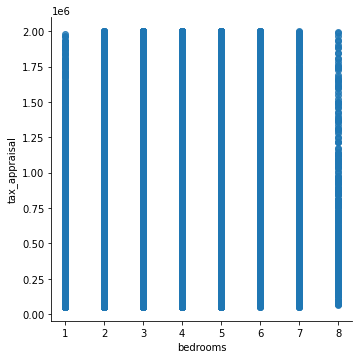

In [72]:
target = 'tax_appraisal'
plot_variable_pairs(qty_df, target)

sns.pairplot(train, hue="tax_appraisal", kind='kde', corner=True)

In [17]:
fig, ax = plt.subplots() # Create the figure and axes object

#### Plot the first x and y axes:
train.plot(x = 'tax_appraisal', y = 'bedrooms', ax = ax) 
#### Plot the second x and y axes. By secondary_y = True a second y-axis is requested:
#### (see https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html for details)
df.plot(x = 'tax_appraisal', y = 'bathrooms', ax = ax, secondary_y = True) 

<AxesSubplot:>

OverflowError: Exceeded cell block limit in Agg.  Please set the value of rcParams['agg.path.chunksize'], (currently 0) to be greater than 100 or increase the path simplification threshold(rcParams['path.simplify_threshold'] = 0.111111111111 by default and path.simplify_threshold = 0.111111111111 on the input).

<Figure size 432x288 with 2 Axes>

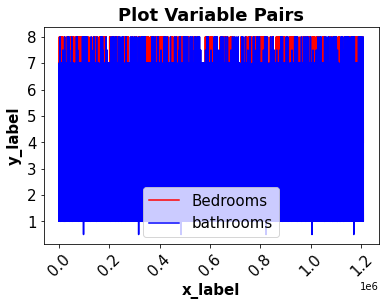

In [16]:
train['bedrooms'].plot(kind='line', color='red', label='Bedrooms')
train['bathrooms'].plot(kind='line', color='blue', label='bathrooms')
#train['bath_to_bed_ratio'].plot(kind='line', color='black', label='bath_to_bed_ratio')

plt.title('Plot Variable Pairs', fontsize=18, weight='bold')

plt.xlabel('x_label', fontsize=15, weight='bold')
plt.xticks(fontsize=15, rotation=45)

plt.ylabel('y_label', fontsize=15, weight='bold')
plt.yticks(fontsize=15)

plt.legend(loc='lower center', fontsize=15)
plt.show()

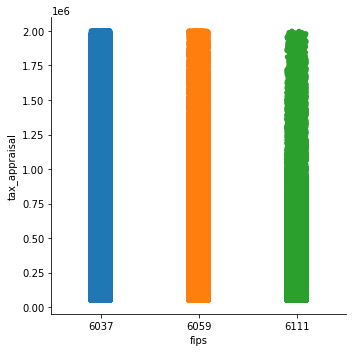

In [15]:
sns.catplot(data=train, y='tax_appraisal', x='fips')

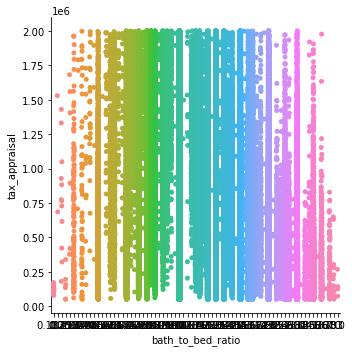

In [19]:
sns.catplot(data=train, y='tax_appraisal', x='bath_to_bed_ratio')

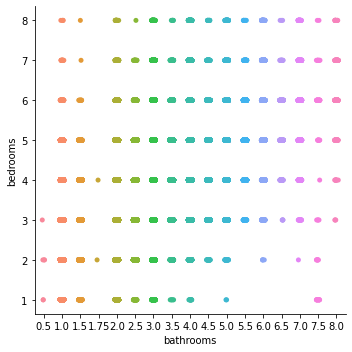

In [22]:
sns.catplot(data=train, y='bedrooms', x='bathrooms')

UFuncTypeError: Cannot cast ufunc 'svd_n_s' input from dtype('O') to dtype('float64') with casting rule 'same_kind'

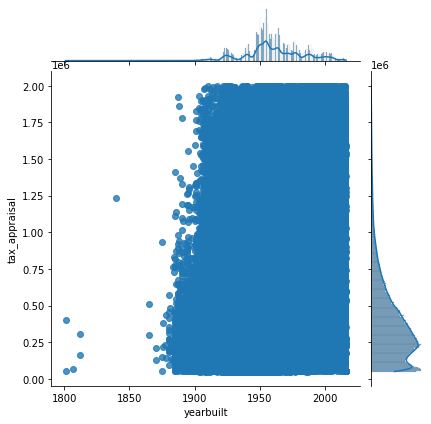

In [21]:
sns.jointplot(data=train, x=train.yearbuilt, y=train.tax_appraisal, kind='reg')

Text(0.5, 1.0, 'Features Correlating with Tax Appraisal')

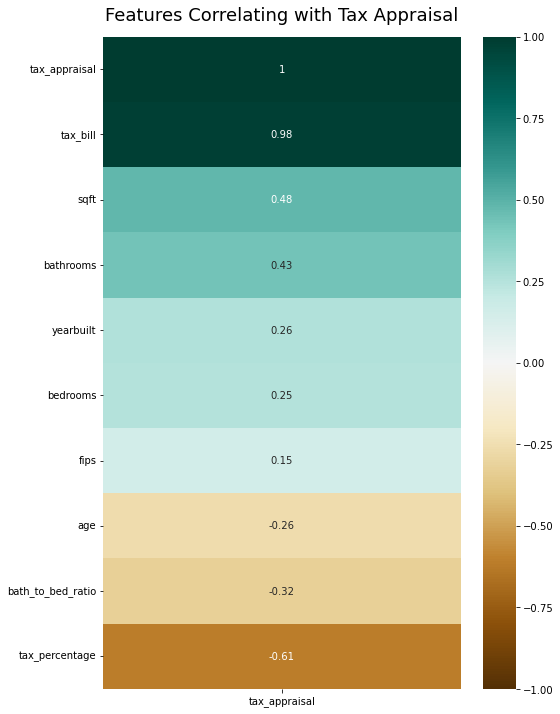

In [23]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(train.corr(method='spearman')[['tax_appraisal']].sort_values(by='tax_appraisal', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Tax Appraisal', fontdict={'fontsize':18}, pad=16)

In [44]:
def plot_variable_pairs(df, target):
    """
    Takes in a dataframe and target variable and plots each feature with the target variable
    """

    cols = df.columns.to_list()
    cols.remove(target) 
    for col in cols:
        sns.lmplot(x=col, y=target, data=df, line_kws={'color': 'red'})
        plt.show()
        
def plot_categorical_and_continuous_vars (df, cat_vars, cont_vars):
    """
    Takes in a dataframe and a list of the columns that hold the continuous and categorical features
    and outputs a boxplot, a violinplot, and a barplot comparing continuous and categorical features.
    """

    for col in cat_vars:
        for col2 in cont_vars:
            fig, (ax1, ax2, ax3) = plt.subplots (1,3, figsize= (16,6))
            fig.suptitle(f' (col) vs. (col2)')
            sns.boxplot (data=df, x=col, y=co12, ax=ax1) 
            sns.violinplot (data=df, x=col, y=col2, ax=ax2) 
            sns.barplot (data=df, x=col, y=col2,ax=ax3)
            plot.show()

In [47]:
plot_variable_pairs(train, target)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

NameError: name 'co12' is not defined

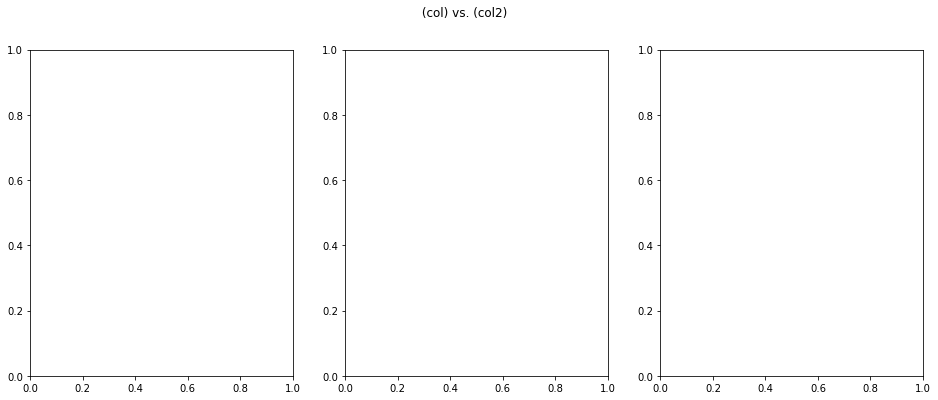

In [49]:
cat_vars = ['bathrooms', 'bedrooms', 'fips']
cont_vars = ['tax_appraisal', 'tax_bill', 'yearbuilt', 'sqft']

plot_categorical_and_continuous_vars (train, cat_vars, cont_vars)

# 3. Write a function named ```plot_variable_pairs``` that accepts a ```dataframe``` as input and plots all of the pairwise relationships along with the regression line for each pair.

# 4. Write a function named ```plot_categorical_and_continuous_vars``` that accepts your ```dataframe``` and the name of the ```columns``` that hold the ```continuous``` and ```categorical``` features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

def plot_categoeical(ser:pd.Series, ax:plt.axes):
    sns.countplot(ser,ax=ax[0])
    ax[1].pie(ser.value_counts(), labels=ser.unique())
def plot_continuous(ser:pd.Series, ax:plt.axes):
    sns.histplot(ser, ax=ac[0])
    sns.violinplot(ser, ax=ac[1]
def plot_categorical_and_continuous(df:pd.DataFrame, categorical:typing.List[str])->None:
                   fig, axs = plt.subplots(df.shape[1], 2, figsize=(9,df.shape[1]*3))
                   for i, d in enumerate(df):
                       if d in categorical:
                           plot_categorical(df[d],axs[i:])
                       else:
                           plot_continuous(df[d],axs[i:])
    plot.show

# 5. Save the functions you have written to create visualizations in your ```explore.py``` file. Rewrite your notebook code so that you are using the functions imported from this file.

# 6. Use the functions you created above to explore your ```Zillow train``` dataset in your ```explore.ipynb``` notebook.

# 7. Come up with some initial hypotheses based on your goal of predicting property value.

# 8. Visualize all combinations of variables in some way.

# 9. Run the appropriate statistical tests where needed.

# 10. What independent variables are correlated with the dependent variable, home value?

# 11. Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?

# 12. Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.

# 13. Explore your dataset with any other visualizations you think will be helpful.

# Bonus Exercise
In a seperate notebook called ```explore_mall```, use the functions you have developed in this exercise with the ```mall_customers``` dataset in the ```Codeup database server```. You will need to write a sql query to ```acquire``` your data. Make ```spending_score``` your target variable.